# Py-ART's Data Model

In this last notebook we saw that Py-ART reads data from files into **Radar** instances, which is Py-ART data model for radar volumes.  In this notebook we will examine this class in detail, looking at what is contained within then and how they can be used to build custom processing methods.

The layout of data in the **Radar** class is derived from the [CfRadial](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/cfradial.html) specification.  For those familar with this specification thinking of the **Radar** class as an in memory version of a CfRadial file is a good mental model.

First, the standand imports

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 9.0]
import pyart

We will use the volume from an ARM XSAPR radar that we examined in the last notebook

In [2]:
radar = pyart.io.read('../data/XSW110520113537.RAW7HHL')

---
This created a [**Radar**](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.html#pyart.core.Radar) instance which is the class Py-ART uses to store and process radar volume data.  Python's built in help system can be used to provide information about this object.

In [3]:
type(radar)

pyart.core.radar.Radar

In [4]:
help(radar)

Help on Radar in module pyart.core.radar object:

class Radar(__builtin__.object)
 |  A class for storing antenna coordinate radar data.
 |  
 |  The structure of the Radar class is based on the CF/Radial Data file
 |  format.  Global attributes and variables (section 4.1 and 4.3) are
 |  represented as a dictionary in the metadata attribute.  Other required and
 |  optional variables are represented as dictionaries in a attribute with the
 |  same name as the variable in the CF/Radial standard.  When a optional
 |  attribute not present the attribute has a value of None.  The data for a
 |  given variable is stored in the dictionary under the 'data' key.  Moment
 |  field data is stored as a dictionary of dictionaries in the fields
 |  attribute.  Sub-convention variables are stored as a dictionary of
 |  dictionaries under the meta_group attribute.
 |  
 |  Refer to the attribute section for information on the parameters.
 |  
 |  Attributes
 |  ----------
 |  time : dict
 |      Tim

We can also use Jupyter's help system.

In [5]:
radar?

---
This tells us about the Radar class in general.  We can use the [`info`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.extract_sweeps.html#pyart.core.Radar.extract_sweeps) method to describe the data in the XSAPR file we have just read. 

In [6]:
radar.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (4278,)>
elevation: <ndarray of type: float32 and shape: (4278,)>
fields:
	radar_echo_classification: <ndarray of type: float32 and shape: (4278, 534)>
	corrected_reflectivity: <ndarray of type: float32 and shape: (4278, 534)>
	differential_phase: <ndarray of type: float32 and shape: (4278, 534)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (4278, 534)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (4278, 534)>
	spectrum_width: <ndarray of type: float32 and shape: (4278, 534)>
	total_power: <ndarray of type: float32 and shape: (4278, 534)>
	reflectivity: <ndarray of type: float32 and shape: (4278, 534)>
	differential_reflectivity: <ndarray of type: float32 and shape: (4278, 534)>
	specific_differential_phase: <ndarray of type: float32 and shape: (4278, 534)>
	velocity: <ndarray of type: float32 and shape: (42

---
Notice that from the above infomation we are looking at a Range Height Indicator or RHI scan.  We can verify this by examining the `scan_type` attribute of the class.

In [7]:
radar.scan_type

'rhi'

The information on these elevation angles is stored in the **elevation** attribute as a Python dictionary, with the numerical values stored as a NumPy array in the 'data' key.

In [8]:
type(radar.elevation)

dict

In [9]:
radar.elevation.keys()

['comment', 'long_name', 'standard_name', 'units', 'data', 'axis']

In [10]:
print radar.elevation['long_name']
print radar.elevation['standard_name']
print radar.elevation['units']

elevation_angle_from_horizontal_plane
beam_elevation_angle
degrees


In [11]:
radar.elevation['data']

array([   1.03271484,    1.28814697,    1.54907227, ...,  178.409729  ,
        178.6706543 ,  178.93707275], dtype=float32)

We can plot the elevation angles for all the sweeps in the volume.

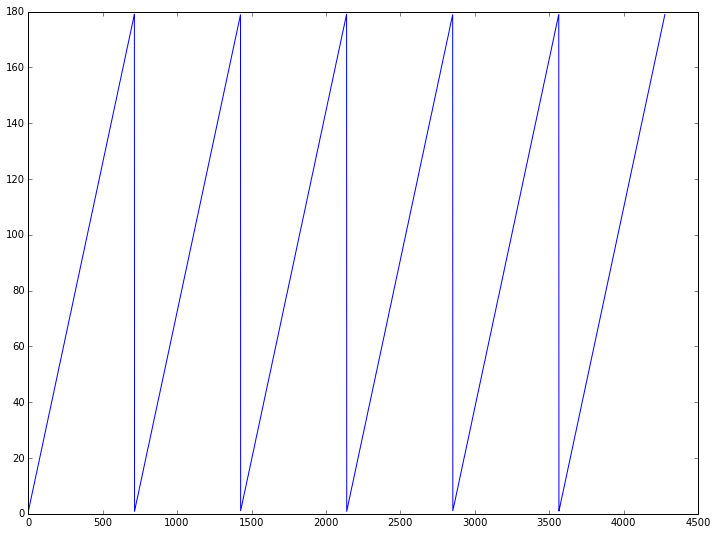

In [12]:
plt.plot(radar.elevation['data'])

By counting the local extrema in the graph, this volume appears to contain 17 sweeps.  We can check to see that this agrees with the number of sweeps reported by the file:

In [13]:
radar.nsweeps

6

The number of rays and gates in each ray is also available.

In [14]:
print radar.nrays
print radar.ngates

4278
534


Other data about the radar volume is stored in dictionary attributes, with the numerical data stored under the 'data' key.

In [15]:
radar.azimuth

{'axis': 'radial_azimuth_coordinate',
 'comment': 'Azimuth of antenna relative to true north',
 'data': array([  37.24639893,   37.24639893,   37.24639893, ...,  187.25372314,
         187.25372314,  187.25372314], dtype=float32),
 'long_name': 'azimuth_angle_from_true_north',
 'standard_name': 'beam_azimuth_angle',
 'units': 'degrees'}

In [16]:
radar.latitude  # also try longitude and latitude

{'data': array([ 36.49103003]),
 'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north'}

In [17]:
radar.time

{'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  29.,   29.,   29., ...,  187.,  187.,  187.]),
 'long_name': 'time_in_seconds_since_volume_start',
 'standard_name': 'time',
 'units': 'seconds since 2011-05-20T11:35:37Z'}

In [18]:
radar.time  # try radar.range for the locations of the gates (bins)

{'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  29.,   29.,   29., ...,  187.,  187.,  187.]),
 'long_name': 'time_in_seconds_since_volume_start',
 'standard_name': 'time',
 'units': 'seconds since 2011-05-20T11:35:37Z'}

Some data may not be available in the original file or not applicable to the volume, when this data is missing the attribute is set to `None`

In [19]:
radar.target_scan_rate

In [20]:
radar.target_scan_rate is None

True

In [21]:
# XSAPR is stationary so the geoference data does not apply
print radar.rotation is None
print radar.tilt is None
print radar.roll is None
print radar.drift is None

True
True
True
True


---
The radar fields or moments are stored in the **fields** attribute as a dictionary of dictionaries. 

In [22]:
radar.fields.keys()

['radar_echo_classification',
 'corrected_reflectivity',
 'differential_phase',
 'cross_correlation_ratio',
 'normalized_coherent_power',
 'spectrum_width',
 'total_power',
 'reflectivity',
 'differential_reflectivity',
 'specific_differential_phase',
 'velocity',
 'corrected_differential_reflectivity']

In [23]:
type(radar.fields['reflectivity'])

dict

In [24]:
radar.fields['reflectivity'].keys()

['_FillValue', 'coordinates', 'long_name', 'standard_name', 'units', 'data']

In [25]:
print radar.fields['reflectivity']['standard_name']
print radar.fields['reflectivity']['units']
print radar.fields['reflectivity']['coordinates']

equivalent_reflectivity_factor
dBZ
elevation azimuth range


Field data is stored as a 2D array with dimensions of rays and gates.  Masked points indicate that the gate was either not collected or below the detection threshold.

In [26]:
print type(radar.fields['reflectivity']['data'])
print radar.fields['reflectivity']['data'].shape
print radar.fields['reflectivity']['data'].dtype

<class 'numpy.ma.core.MaskedArray'>
(4278, 534)
float32


Instrument parameters are also stored as a dictionary of dictionaries

In [27]:
radar.instrument_parameters.keys()

['prt_mode',
 'unambiguous_range',
 'pulse_width',
 'prt',
 'nyquist_velocity',
 'radar_beam_width_h',
 'radar_beam_width_v']

In [28]:
radar.instrument_parameters['nyquist_velocity']

{'comments': 'Unambiguous velocity',
 'data': array([ 12.94250011,  12.94250011,  12.94250011, ...,  12.94250011,
         12.94250011,  12.94250011], dtype=float32),
 'long_name': 'Nyquist velocity',
 'meta_group': 'instrument_parameters',
 'units': 'meters_per_second'}

---
## Accessing data from specific sweeps

Often we want to work with a single sweep and therefore need to extact out the data from a particular sweep.  The **Radar** class stores some sweep specific information.

In [29]:
radar.fixed_angle

{'data': array([  37.29858398,   67.30224609,   97.30041504,  127.29858398,
         157.30224609,  187.30041504], dtype=float32),
 'long_name': 'Target angle for sweep',
 'standard_name': 'target_fixed_angle',
 'units': 'degrees'}

In [30]:
radar.sweep_number

{'data': array([0, 1, 2, 3, 4, 5], dtype=int32),
 'long_name': 'Sweep number',
 'standard_name': 'sweep_number',
 'units': 'count'}

In [31]:
radar.sweep_mode

{'comment': 'Options are: "sector", "coplane", "rhi", "vertical_pointing", "idle", "azimuth_surveillance", "elevation_surveillance", "sunscan", "pointing", "manual_ppi", "manual_rhi"',
 'data': array(['rhi', 'rhi', 'rhi', 'rhi', 'rhi', 'rhi'], 
       dtype='|S3'),
 'long_name': 'Sweep mode',
 'standard_name': 'sweep_mode',
 'units': 'unitless'}

The indices which delinate a particular sweep are stored in the **sweep_start_ray_index** and **sweep_end_ray_index** attributes of the radar object.  

In [32]:
radar.sweep_start_ray_index

{'data': array([   0,  713, 1426, 2139, 2852, 3565], dtype=int32),
 'long_name': 'Index of first ray in sweep, 0-based',
 'units': 'count'}

In [33]:
radar.sweep_end_ray_index

{'data': array([ 712, 1425, 2138, 2851, 3564, 4277], dtype=int32),
 'long_name': 'Index of last ray in sweep, 0-based',
 'units': 'count'}

The rays_per_sweep attribute provides a count of the number of rays in each sweep.

In [34]:
radar.rays_per_sweep

{'data': array([713, 713, 713, 713, 713, 713], dtype=int32),
 'long_name': 'Number of rays in each sweep',
 'units': 'count'}

The first sweep starts at ray 0 and the last ray in the sweep is  ray 712.  We can plot the elevation angles from just this sweep.

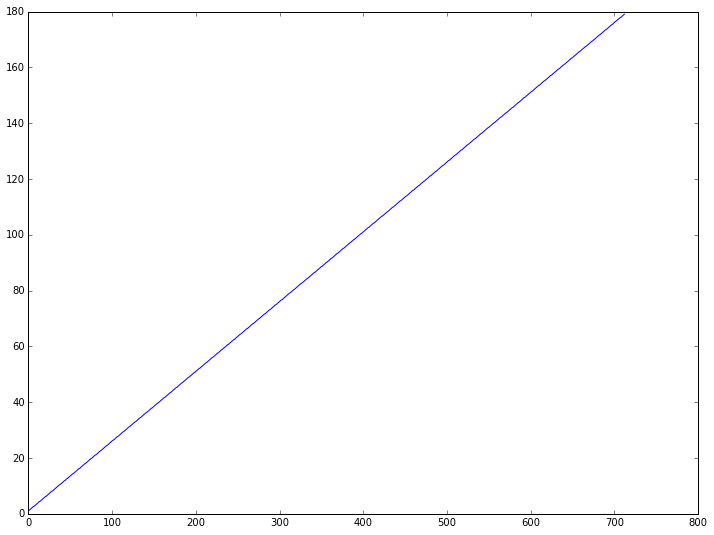

In [35]:
plt.plot(radar.elevation['data'][0:713])

These limits can also be detemined for a specific sweep using the [`get_start`](), [`get_end`](), or [`get_start_end`]() methods 

In [36]:
print radar.get_start(0)
print radar.get_end(0)
print radar.get_start_end(0)

0
712
(0, 712)


Using these to access sweep data can be cumbersome and care must be taken to avoid off-by-one errors.  For convenience the Radar object provides a [`get_slice`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.get_slice.html#pyart.core.Radar.get_slice) method which returns a slice object that can be used to select out the rays belonging to a particular sweep.

In [37]:
radar.get_slice?

---
Using this functionality to plot the elevation angles from the first two sweeps in the volume.

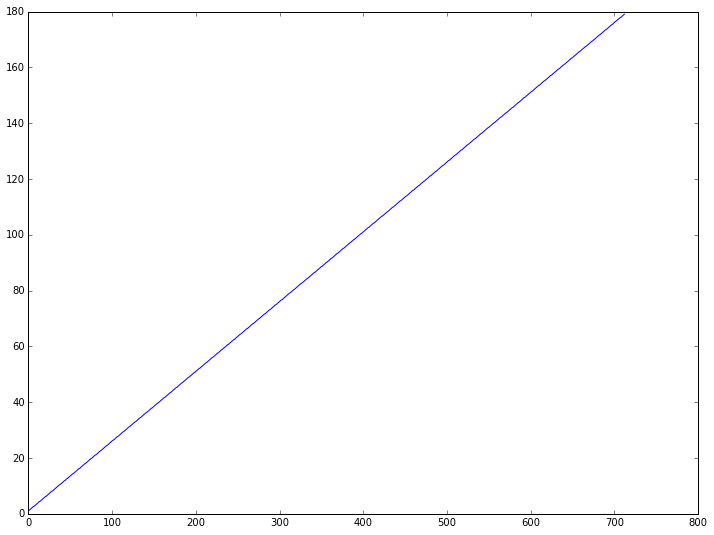

In [38]:
sweep_0_slice = radar.get_slice(0)
plt.plot(radar.elevation['data'][sweep_0_slice])

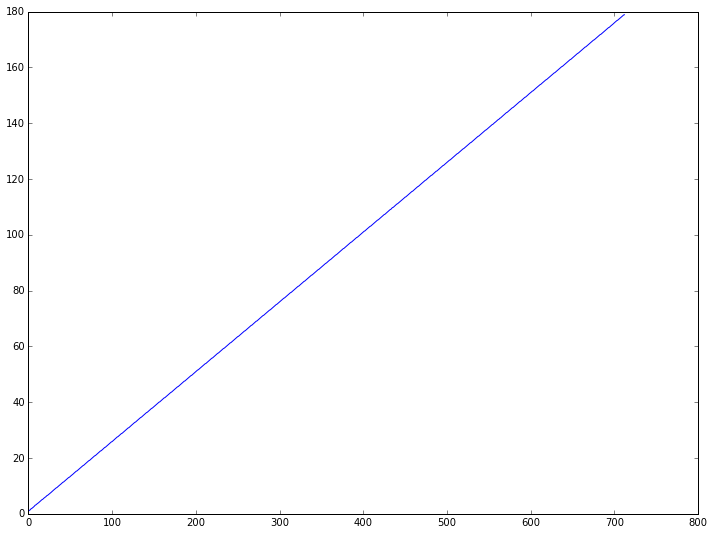

In [39]:
sweep_1_slice = radar.get_slice(1)
plt.plot(radar.elevation['data'][sweep_1_slice])

---
The radar class offers still another method which further simplified this procedure, [`get_elevation`](). 

In [40]:
help(radar.get_elevation)

Help on method get_elevation in module pyart.core.radar:

get_elevation(self, sweep, copy=False) method of pyart.core.radar.Radar instance
    Return an array of elevation angles for a given sweep.
    
    Parameters
    ----------
    sweep : int
        Sweep number to retrieve data for, 0 based.
    copy : bool, optional
        True to return a copy of the elevations. False, the default,
        returns a view of the elevations (when possible), changing this
        data will change the data in the underlying Radar object.
    
    Returns
    -------
    azimuths : array
        Array containing the elevation angles for a given sweep.



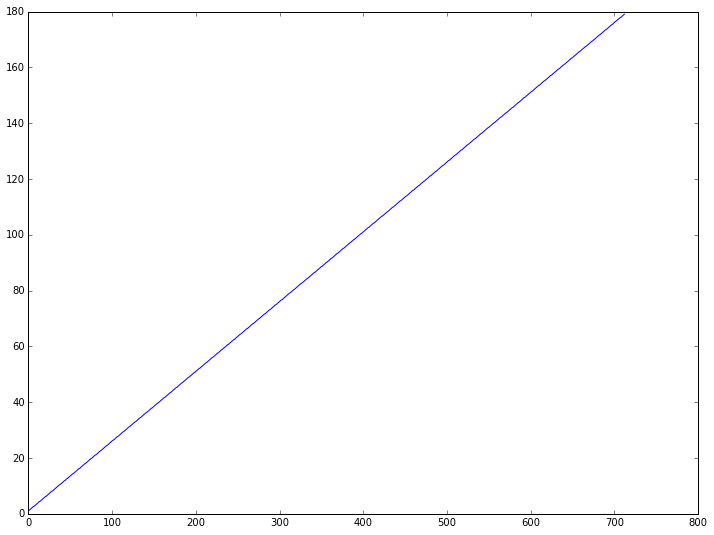

In [41]:
plt.plot(radar.get_elevation(0))

The azimuth angles can extracted in the same manner using the [`get_azimuth`]() method

---
Plotting this data in a b-scan representation.

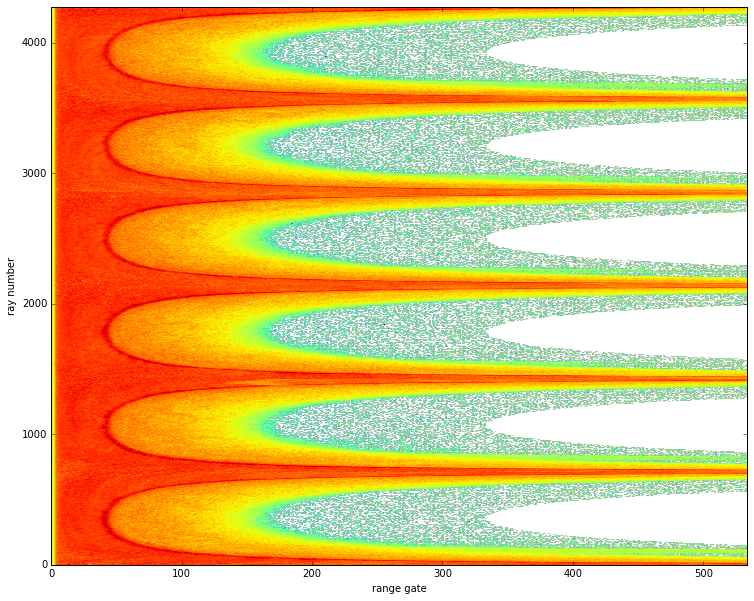

In [42]:
plt.figure(figsize=(20, 10))
plt.imshow(radar.fields['reflectivity']['data'], aspect=0.1, origin='bottom')
plt.xlabel('range gate')
plt.ylabel('ray number')

---
Slice objects can also select out field data form a particular sweep.

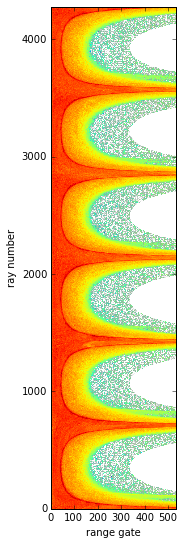

In [43]:
plt.imshow(radar.fields['reflectivity']['data'], aspect=0.5, origin='bottom')
plt.xlabel('range gate')
plt.ylabel('ray number')

In [44]:
sweep_1_slice = radar.get_slice(1)

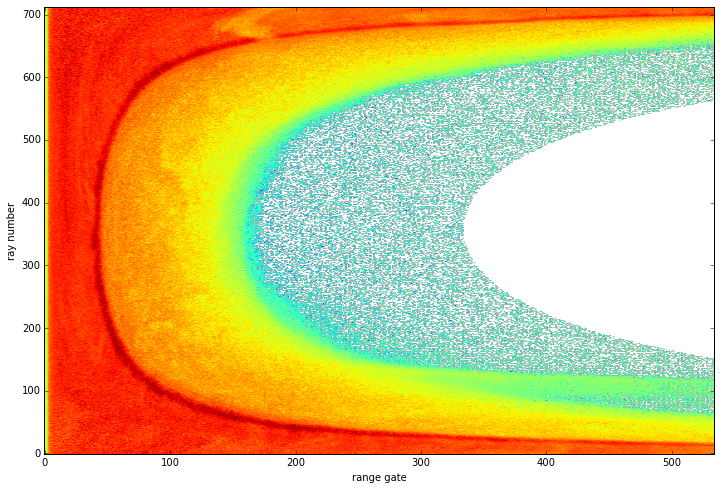

In [45]:
plt.imshow(radar.fields['reflectivity']['data'][sweep_1_slice], aspect=0.5, origin='bottom')
plt.xlabel('range gate')
plt.ylabel('ray number')

The [`get_field`]() method can simplify this even further.

In [46]:
help(radar.get_field)

Help on method get_field in module pyart.core.radar:

get_field(self, sweep, field_name, copy=False) method of pyart.core.radar.Radar instance
    Return the field data for a given sweep.
    
    Parameters
    ----------
    sweep : int
        Sweep number to retrieve data for, 0 based.
    field_name : str
        Name of the field from which data should be retrieved.
    copy : bool, optional
        True to return a copy of the data. False, the default, returns
        a view of the data (when possible), changing this data will
        change the data in the underlying Radar object.
    
    Returns
    -------
    data : array
        Array containing data for the requested sweep and field.



In [47]:
refl_sweep_data = radar.get_field(sweep=0, field_name='reflectivity')

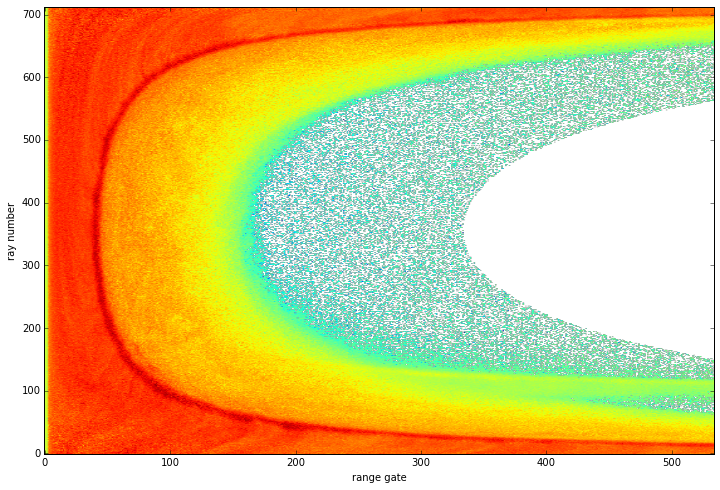

In [48]:
plt.imshow(refl_sweep_data, aspect=0.5, origin='bottom')
plt.xlabel('range gate')
plt.ylabel('ray number')

---
A final method for accessing a specific sweep is to use the [`extract_sweeps`]() method to create a new **Radar** instrance which contains only a single sweep.

In [49]:
print radar.nrays
print radar.nsweeps

4278
6


In [50]:
radar2 = radar.extract_sweeps([0])

In [51]:
print radar2.nrays
print radar2.nsweeps

713
1


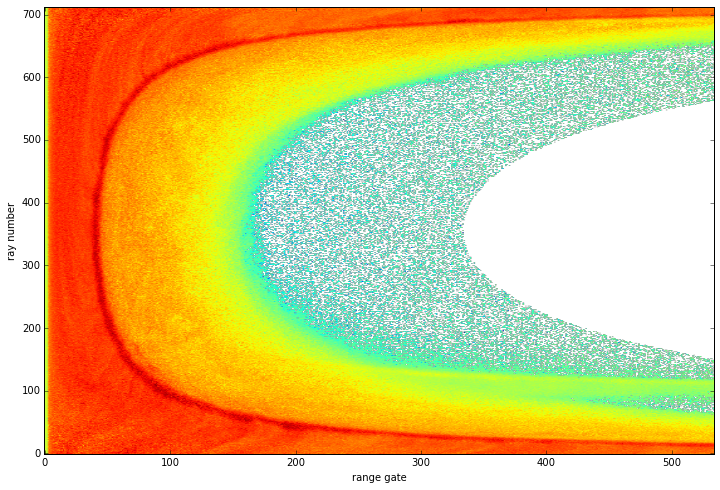

In [52]:
plt.imshow(radar2.fields['reflectivity']['data'], aspect=0.5, origin='bottom')
plt.xlabel('range gate')
plt.ylabel('ray number')

## Iterating over sweeps

Another common task is to loop over all sweeps in the volume.  The **Radar** class contains a number of helpful methods to accomplish this task.

In [53]:
for start in radar.iter_start():
    print start

0
713
1426
2139
2852
3565


In [54]:
for end in radar.iter_end():
    print end

712
1425
2138
2851
3564
4277


In [55]:
for start, end in radar.iter_start_end():
    print start, end

0 712
713 1425
1426 2138
2139 2851
2852 3564
3565 4277


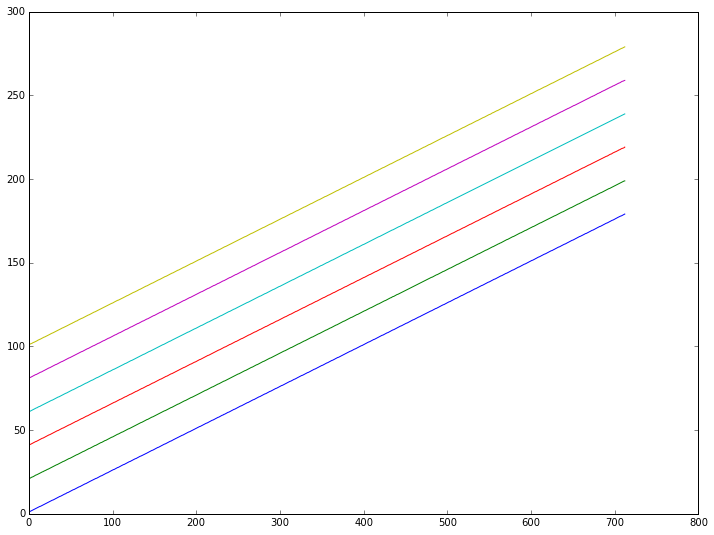

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, sweep_slice in enumerate(radar.iter_slice()):
    ax.plot(radar.elevation['data'][sweep_slice] + i * 20)

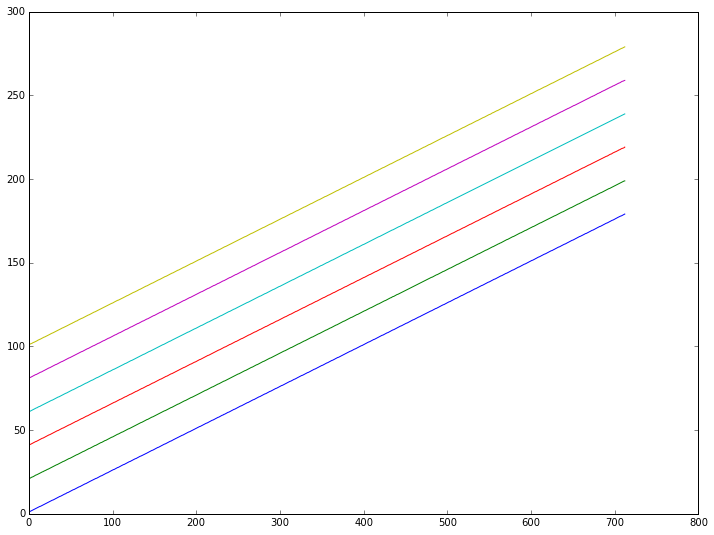

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, elev_data in enumerate(radar.iter_elevation()):
    ax.plot(elev_data + i * 20)

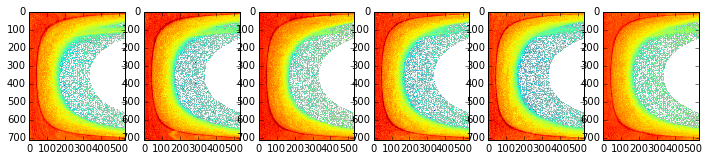

In [58]:
fig = plt.figure()
for i, refl_sweep_data in enumerate(radar.iter_field('reflectivity')):
    ax = fig.add_subplot(1, radar.nsweeps, i+1) 
    ax.imshow(refl_sweep_data)